# Logistic Regression in R
#### This is a practice of what's on https://youtu.be/C4N3_XJJ-jU
#### Data is from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
#### & https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/
#### (wdbc.data & wdbc.names)

In [1]:
# Read data
BCdata <- read.csv('wdbc.data', header=FALSE)

# The data file doesn't come with header. Add it from wdbc.names file.
# colnames(data) <- c("","","",...) works as well.
names(BCdata)[1]  <- 'ID_number'
names(BCdata)[2]  <- 'Diagnosis'
names(BCdata)[3]  <- 'radius'
names(BCdata)[4]  <- 'texture'
names(BCdata)[5]  <- 'perimeter'
names(BCdata)[6]  <- 'area'
names(BCdata)[7]  <- 'smoothness'
names(BCdata)[8]  <- 'compactness'
names(BCdata)[9]  <- 'concavity'
names(BCdata)[10] <- 'concave_points'
names(BCdata)[11] <- 'symmetry'
names(BCdata)[12] <- 'fractal_dimension'

# We will use just the first 12 columns.
BCdata = BCdata[,1:12]
# Cursory check
BCdata

ID_number,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613
844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742
84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451
844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389


In [2]:
str(BCdata)

'data.frame':	569 obs. of  12 variables:
 $ ID_number        : int  842302 842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 ...
 $ Diagnosis        : Factor w/ 2 levels "B","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ radius           : num  18 20.6 19.7 11.4 20.3 ...
 $ texture          : num  10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter        : num  122.8 132.9 130 77.6 135.1 ...
 $ area             : num  1001 1326 1203 386 1297 ...
 $ smoothness       : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness      : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity        : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave_points   : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry         : num  0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension: num  0.0787 0.0567 0.06 0.0974 0.0588 ...


Loading required package: ggplot2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



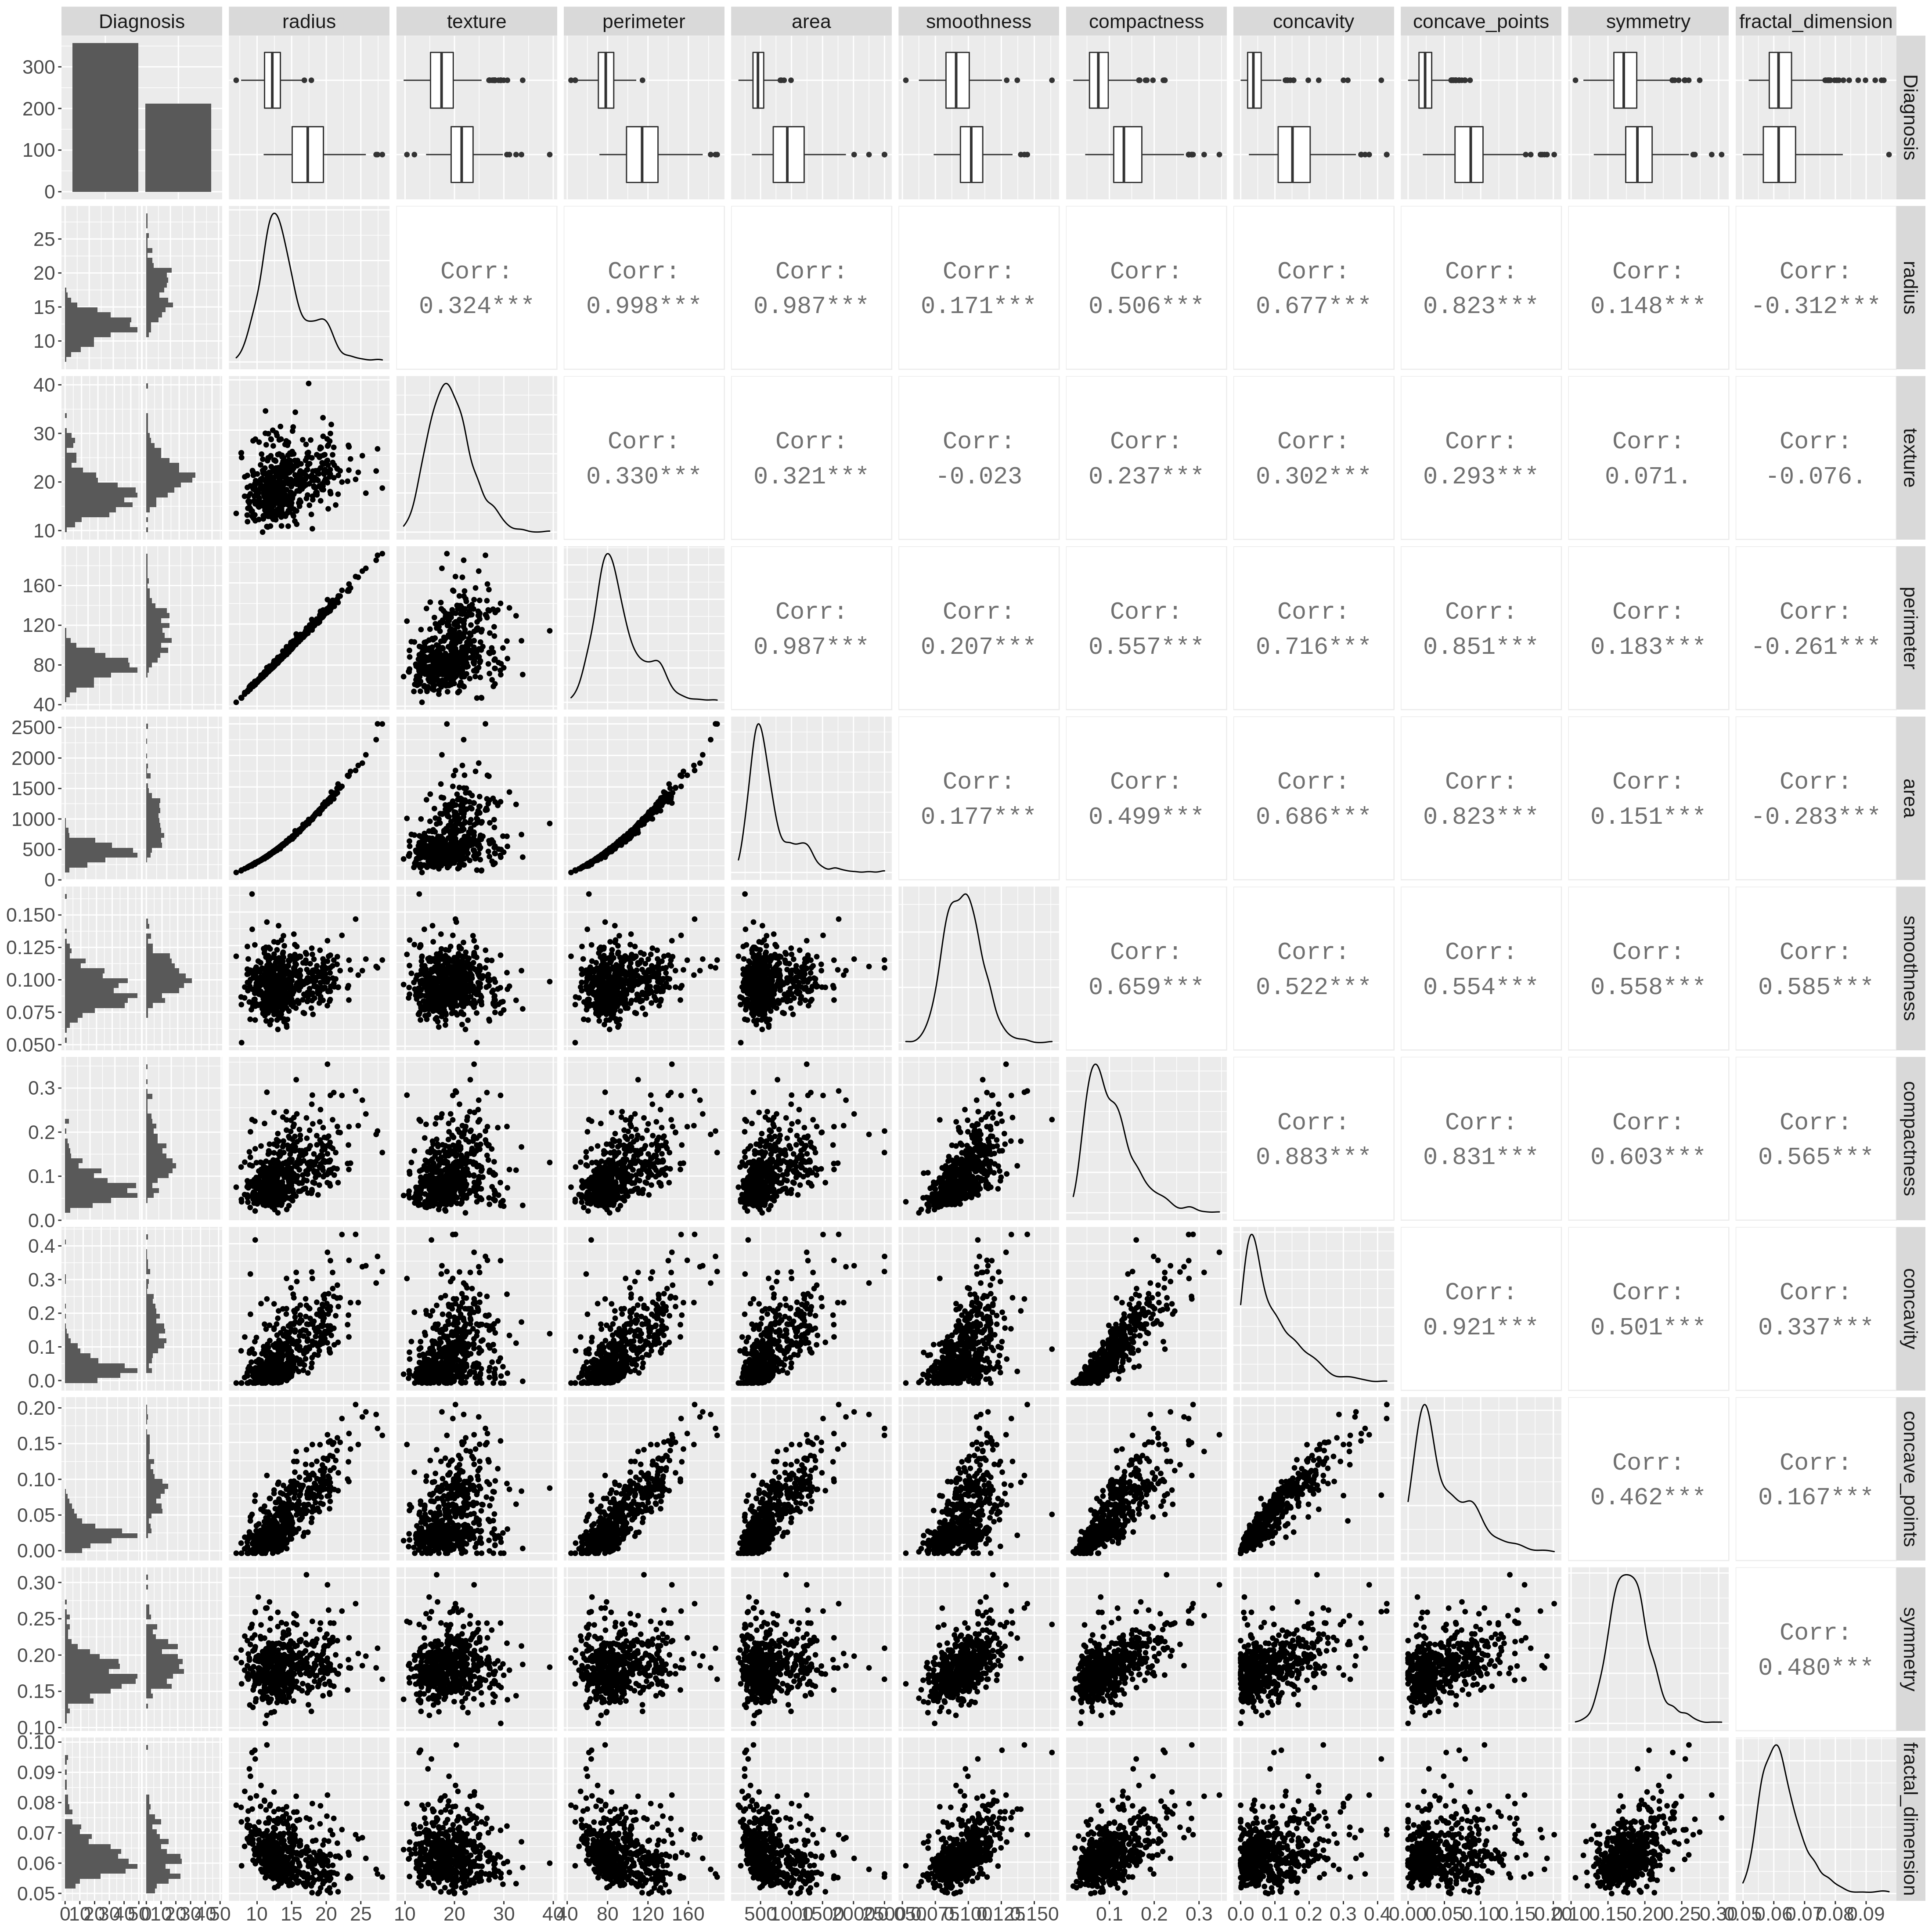

In [3]:
# Matrix plot
library(GGally)
scol = 2    # starting column number (index)
ncol = 11    # the number of columns to plot
psize   = 2.0*(ncol)    # 2" per column
options(repr.plot.height=psize, repr.plot.width=psize,repr.plot.res = 200)
ggpairs(BCdata[,scol:(scol+ncol-1)], diag = list(continuous = "densityDiag"), upper = list(continuous = wrap('cor', size=7))) +
                                                                                      theme(text = element_text(size = 20))

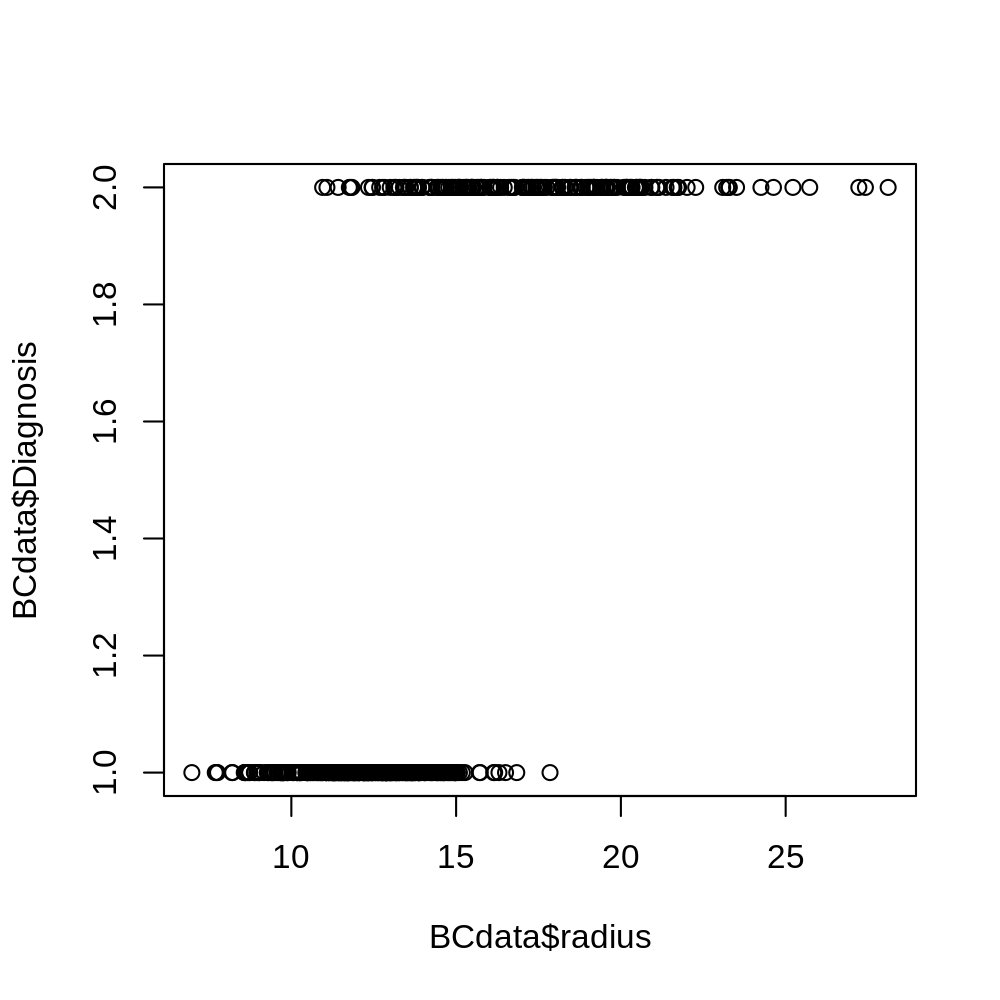

In [4]:
# Plot 'Diagnosis'(y) vs 'radius'(x)
options(repr.plot.height=5, repr.plot.width=5, repr.plot.res = 200)
plot(BCdata$radius, BCdata$Diagnosis)

In [5]:
# Build a logistic regression model to predict Diagnosis using radius.
BC.logistic <- glm(Diagnosis ~ radius, data=BCdata, family='binomial')

In [6]:
summary(BC.logistic)
# Call: just reprint what you asked above. Building a logistic regression model using 2 columns.
# Deviance Residuals: good when they're close to being centered on 0 and roughly symmetrical.
# Coefficients: the fitted line equation. y=b+ax. b=-15.24587, a=1.03359, y being yes/no x being radius
#                                         if x is a factor, it would be 0, 1, 2, etc.
#                                         if radius=0, diagnosis=-15.24587. This means log(odds) that a patient has diagnosis M=-15.24587
#                                         the slope=1.03359 is the log(odds ratio) of the odds that a patient will have diagnosis=M
#                                         with 1 unit of radius.
#
#                                         b=-15.24587 means that when radius=0, the log(odds of M, p/(1-p)) are -15.24587
#                                         a=1.03359 means that for every one unit of radius gained, the log(odd of M, p/(1-p))
#                                         increases by 1.03359
#
#               Std. Error & z value: Wald's test result
#               z-value is the number of standard deviations the estimate is from 0 on a standard normal curve.
#               11.10 is more than 2 standard deviations from 0, so it is statistically significant.
#               This is confirmed with the small p-value.
#               p value should be below 0.05. In this case, the log(odds) and the log(odds ratios) are both statistically significant.
#               A small p-value alone isn't interesting, we also want large effect sizes, and that's what the log(odds) and log(odds ratio) tells us.
# 
# (Dispersion parameter for binomial family taken to be 1):
#       When we do "notmal" linear regression, we estimate both the mean and the variance from the data.
#       In contrast, with logistic regression, we estimate the means of the data, and the variance is derived from the mean.
#       Since we are not estimating the variance from the data (and, instead, just deriving it from the mean), it is
#       possible that the variance is underestimated.
#       If so, you can adjust the dispersion parameter in teh summary() command.
#       Null deviance     = 2*(LL(Saturated Model)-LL(Null Model))
#       Residual deviance = 2*(LL(Saturated Model)-LL(Proposed Model))
#
# AIC: Akaike Information Criterion. In this context, this is just the residual deviance adjusted 
#      for the number of parameters in the model.
# Number of Fisher Scoring itereations: tells us how quickly the glm() function converged 
#                                       on the maximum likelihood estimates for the coefficients.


Call:
glm(formula = Diagnosis ~ radius, family = "binomial", data = BCdata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5470  -0.4694  -0.1746   0.1513   2.8098  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -15.24587    1.32463  -11.51   <2e-16 ***
radius        1.03359    0.09311   11.10   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 751.44  on 568  degrees of freedom
Residual deviance: 330.01  on 567  degrees of freedom
AIC: 334.01

Number of Fisher Scoring iterations: 6


In [7]:
# Predict y using a new x.
new_data = data.frame(radius = 7)
predict(BC.logistic, new_data, type='response')    # type='response' gives probability of Diagnosis M
new_data = data.frame(radius = 25.0)
predict(BC.logistic, new_data, type='response')    # type='response' gives probability of Diagnosis M

1 
0.000331766

1 
0.9999749

# Logistic Regression (multiple features) in R
#### Unlike the above case, use multiple inputs (x features) to predict a single output (y values).

In [8]:
# Build a multiple regression model to predict Diagnosis using all features. '.' means all columns.
BCM.logistic <- glm(Diagnosis ~ ., data=BCdata[,2:12], family='binomial')
#                      y = y-intercept + slope1 * x1 + slope2 * x2 + ...

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [9]:
summary(BCM.logistic)
# Coefficients: radius isn't a useful predictor because it has a large p-value.
#               texture is a good predictor.
# Residual Deviance and the AIC are both much smaller for this all in model than they were for the simple model (see above).


Call:
glm(formula = Diagnosis ~ ., family = "binomial", data = BCdata[, 
    2:12])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.95590  -0.14839  -0.03943   0.00429   2.91690  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -7.35952   12.85259  -0.573   0.5669    
radius             -2.04930    3.71588  -0.551   0.5813    
texture             0.38473    0.06454   5.961  2.5e-09 ***
perimeter          -0.07151    0.50516  -0.142   0.8874    
area                0.03980    0.01674   2.377   0.0174 *  
smoothness         76.43227   31.95492   2.392   0.0168 *  
compactness        -1.46242   20.34249  -0.072   0.9427    
concavity           8.46870    8.12003   1.043   0.2970    
concave_points     66.82176   28.52910   2.342   0.0192 *  
symmetry           16.27824   10.63059   1.531   0.1257    
fractal_dimension -68.33703   85.55666  -0.799   0.4244    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’

In [10]:
ll.null     <- BCM.logistic$null.deviance/-2    # log-likelihood of the null model
ll.proposed <- BCM.logistic$deviance/-2         # log-likelihood for the fancy model
(ll.null-ll.proposed)/ll.null                   # Pseudo R^2
1-pchisq(2*(ll.proposed-ll.null), df=(length(BCM.logistic$coefficients)-1))  # p-value. very small, so the R^2 value 
#                                                                              isn't due to dumb luck.

[1] 0.8055328

[1] 0

Saving 6.67 x 6.67 in image



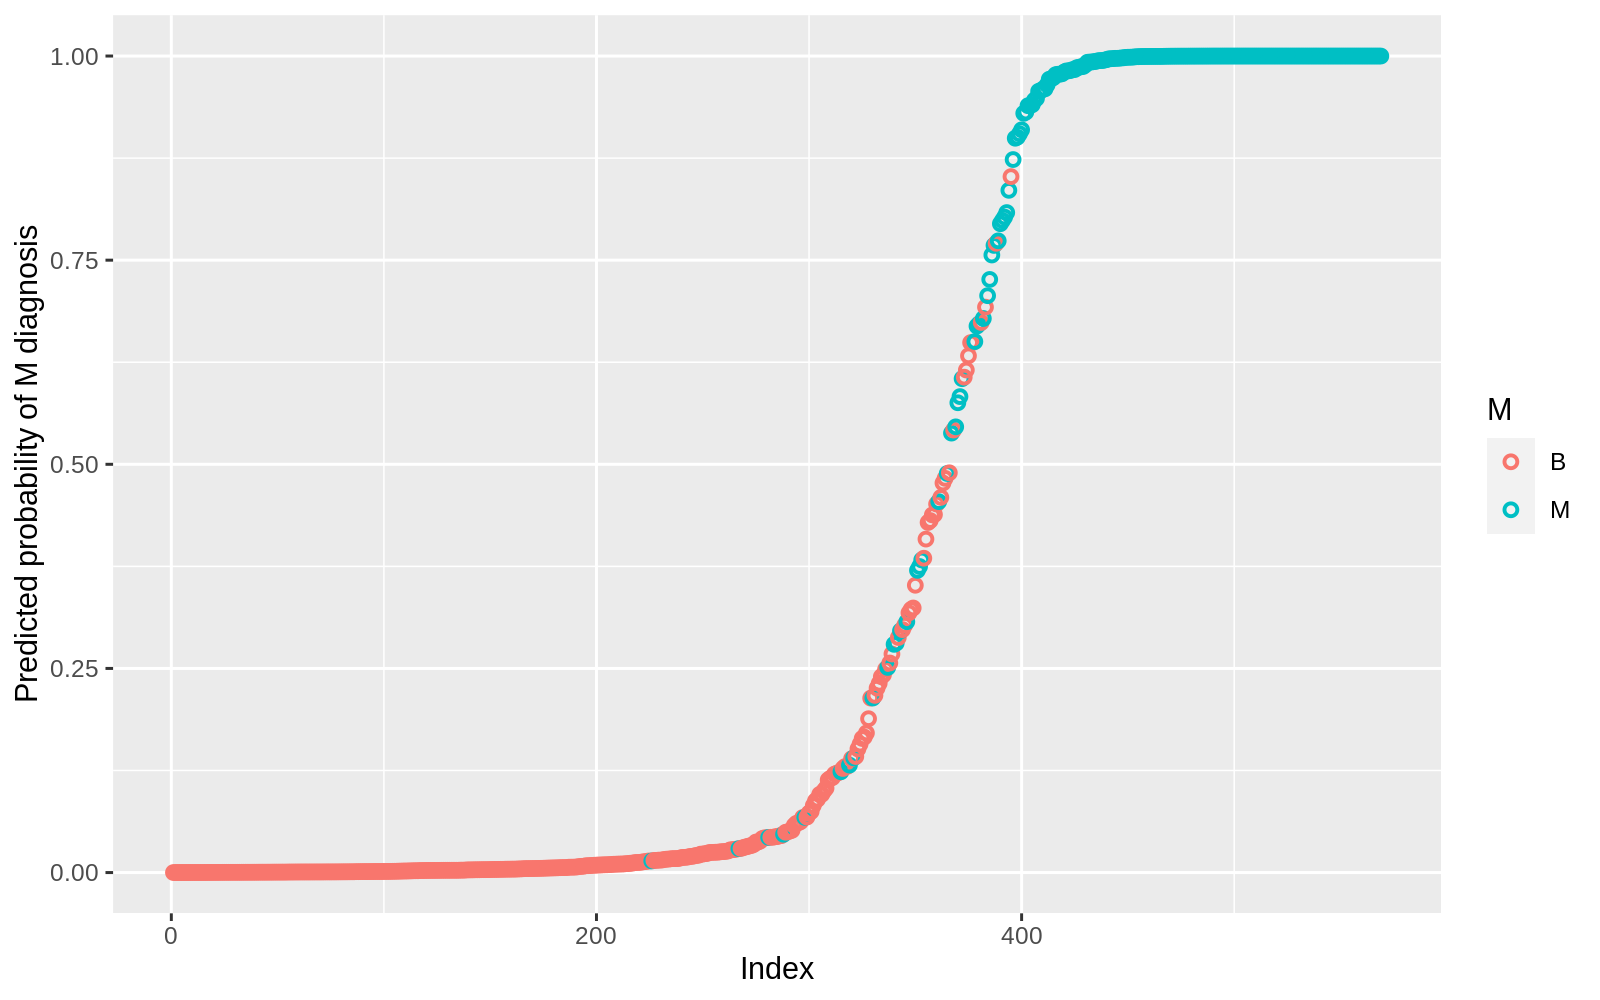

In [11]:
# Plotting the probabilities of Diagnosis=M along with the actual Diagnosis=M.
predicted.data <- data.frame(probability.of.M=BCM.logistic$fitted.values, M=BCdata$Diagnosis)

# Sort the data.frame from low probabilities to high probabilies.
predicted.data <-predicted.data[order(predicted.data$probability.of.M, decreasing=FALSE),]
predicted.data$rank <- 1:nrow(predicted.data)

# Load the ggplot2
library(ggplot2)

options(repr.plot.height=5, repr.plot.width=8, repr.plot.res = 200)
ggplot(data=predicted.data, aes(x=rank, y=probability.of.M)) +
geom_point(aes(color=M), alpha=1, shape=1, stroke=1) +
xlab('Index') +
ylab('Predicted probability of M diagnosis')

# save the graph as a PDF file
ggsave('breast_cancer_probabilities.pdf')

In [12]:
# Build a multiple regression model to predict Diagnosis using all features. '.' means all columns.
# Unlike the case above, use features with small p values.
BC_mini = BCdata[,c('Diagnosis','texture','area','concave_points')]
BCM_mini.logistic <- glm(Diagnosis ~ ., data=BC_mini, family='binomial')
#                      y = y-intercept + slope1 * x1 + slope2 * x2 + ...

In [13]:
summary(BCM_mini.logistic)
# Coefficients: radius isn't a useful predictor because it has a large p-value.
#               texture is a good predictor.
# Residual Deviance and the AIC are both much smaller for this all in model than they were for the simple model (see above).


Call:
glm(formula = Diagnosis ~ ., family = "binomial", data = BC_mini)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.27200  -0.15271  -0.04820   0.02016   2.80715  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -16.748069   1.922261  -8.713  < 2e-16 ***
texture          0.325463   0.055660   5.847 4.99e-09 ***
area             0.007776   0.001451   5.359 8.37e-08 ***
concave_points 101.603693  13.126390   7.740 9.91e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 751.44  on 568  degrees of freedom
Residual deviance: 161.70  on 565  degrees of freedom
AIC: 169.7

Number of Fisher Scoring iterations: 8


In [14]:
ll.null     <- BCM_mini.logistic$null.deviance/-2    # log-likelihood of the null model
ll.proposed <- BCM_mini.logistic$deviance/-2         # log-likelihood for the fancy model
(ll.null-ll.proposed)/ll.null                   # Pseudo R^2
1-pchisq(2*(ll.proposed-ll.null), df=(length(BCM_mini.logistic$coefficients)-1))  # p-value. very small, so the R^2 value 
#                                                                              isn't due to dumb luck.

[1] 0.7848181

[1] 0